In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
df = pd.read_csv('iris.data', header=None, names=['sepal length', 'sepal width', 'petal length','petal width','class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [4]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

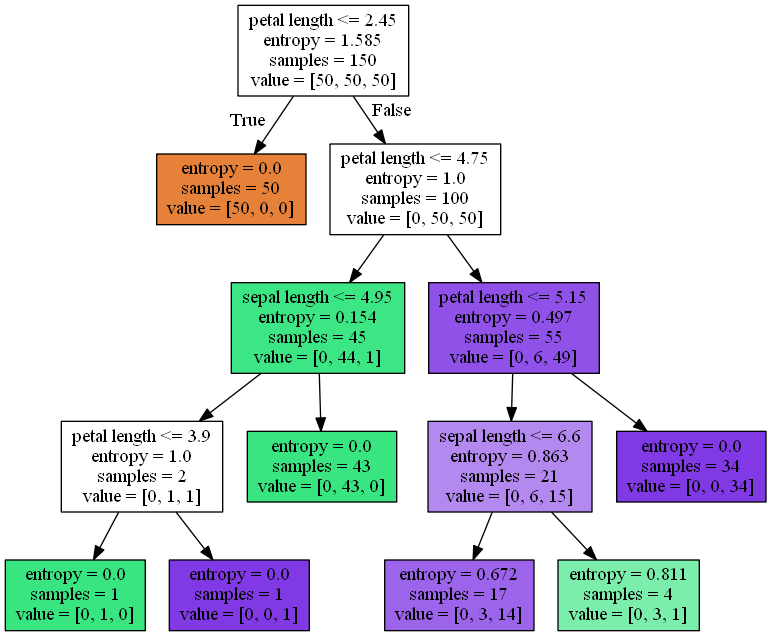

In [5]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.model_selection import cross_val_score

#Run tree
X = df.iloc[:,0:3]
Y = df['class']
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features=2, max_depth=4)
decision_tree.fit(X, Y)

#Render tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [6]:
from sklearn.model_selection import cross_val_score

#save time
start_time = time.clock()

#run decision tree
score = cross_val_score(decision_tree,X,Y,cv=5)

#calc run time
runtime = time.clock() - start_time, "seconds"

print(score,'\n\nmean: ', score.mean())
print('\nruntime: ', runtime)

[ 0.9         0.93333333  0.83333333  0.86666667  0.93333333] 

mean:  0.893333333333

runtime:  (0.009590494935952433, 'seconds')


In [7]:
from sklearn import ensemble

#fit random forest
rfc = ensemble.RandomForestClassifier(n_estimators=20, criterion='entropy', max_features=2,max_depth=4)

#save time
start_time = time.clock()

#run random forest
score = cross_val_score(rfc, X, Y, cv=5)

#calc run time
runtime = time.clock() - start_time, "seconds"

print(score,'\n\nmean: ', score.mean())
print('\nruntime: ', runtime)

[ 0.93333333  1.          0.86666667  0.93333333  1.        ] 

mean:  0.946666666667

runtime:  (0.07439752816061981, 'seconds')
